# Análisis de regresión: variables dicotómicas

Una variable dicotómica toma solo dos valores, generalmente 0 y 1, y se utiliza para representar categorías. Por ejemplo:
- Genero_femenino = 1 si el individuo es mujer, 0 si es hombre.
- Sucursal_Norte = 1 si pertenece a la sucursal del norte, 0 en caso contrario.

En un modelo de regresión lineal, el coeficiente β de una variable dicotómica se interpreta como la diferencia en el valor promedio de la variable dependiente entre el grupo codificado como 1 y el grupo de referencia (codificado como 0), manteniendo constantes las demás variables.

*Interpretación de coeficientes de regresión para variables dicotómicas*

Supón que estimas el siguiente modelo:

Ventas = β₀ + β₁ * Publicidad + β₂ * Genero_femenino + ε

Y el resultado de la regresión es:
- β₀ = 120
- β₁ = 5.2
- β₂ = 18.7

La interpretación es:
- Por cada unidad adicional de gasto en publicidad, las ventas aumentan en promedio 5.2 unidades (β₁).
- Si el cliente es mujer (Genero_femenino = 1), las ventas aumentan en promedio 18.7 unidades en comparación con hombres (Genero_femenino = 0), manteniendo constante el gasto en publicidad (β₂).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## 9.1. Variables dicotómicas

El archivo *ubermty* contiene información de viajes en taxi o uber en la ciudad de Monterrey de junio de 2016 a agosto de 2017. Crearemos un modelo para estimar la duración de cada viaje en función de la distancia y el día de la semana.

In [2]:
variables=['id', 'dropoff_longitude', 'dropoff_latitude', 
           'Dia', 'DuracionMinutos', 'DistanciaKm']

# Cargar los datos
df = pd.read_excel('https://github.com/adan-rs/AnalisisDatos/raw/main/data/ubermty.xlsx', usecols=variables)

In [3]:
# Revisar las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9482 entries, 0 to 9481
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9482 non-null   int64  
 1   dropoff_longitude  9482 non-null   float64
 2   dropoff_latitude   9482 non-null   float64
 3   DuracionMinutos    9482 non-null   float64
 4   DistanciaKm        9482 non-null   float64
 5   Dia                9482 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 444.6+ KB


In [4]:
# Obtener la estadística descriptiva
df.describe().T

count          mean           std         min  \
id                 9482.0  43402.521198  25380.480870    3.000000   
dropoff_longitude  9482.0   -100.302251      0.129046 -100.638818   
dropoff_latitude   9482.0     25.700429      0.053719   25.462341   
DuracionMinutos    9482.0     20.922733     24.412291    0.516667   
DistanciaKm        9482.0      8.055608      7.181968    0.201000   

                            25%           50%           75%           max  
id                 21634.250000  44131.000000  62190.500000  90275.000000  
dropoff_longitude   -100.403559   -100.305847   -100.187182    -99.948161  
dropoff_latitude      25.661272     25.686222     25.742285     25.984867  
DuracionMinutos        8.316667     14.033333     23.912500    284.733333  
DistanciaKm            3.264250      5.832500     10.315750     49.993000

In [5]:
# Filtrado de valores atípicos
Q1 = df['DuracionMinutos'].quantile(0.25)
Q3 = df['DuracionMinutos'].quantile(0.75)
IQR = Q3-Q1
lim_inf = Q1-1.5*IQR
lim_sup = Q3+1.5*IQR
df = df[(df['DuracionMinutos']>lim_inf)&(df['DuracionMinutos']<lim_sup)]

<Axes: xlabel='dropoff_longitude', ylabel='dropoff_latitude'>

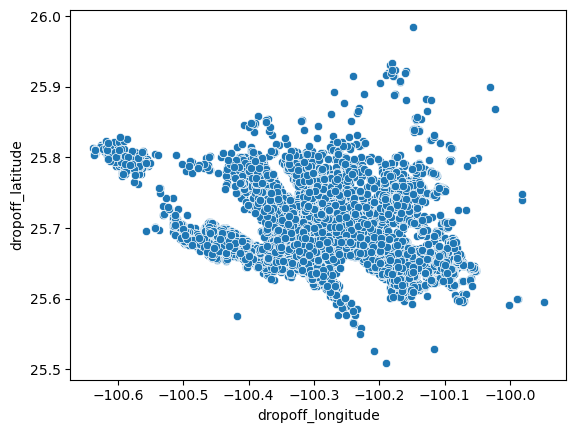

In [6]:
# Generar un gráfico
sns.scatterplot(x="dropoff_longitude",
                y="dropoff_latitude",
                data=df)

In [7]:

import folium
map_center = [df['dropoff_latitude'].mean(), df['dropoff_longitude'].mean()]
mapa = folium.Map(location=map_center, zoom_start=10)
for index, row in df.iterrows():
    folium.CircleMarker(
        location=[row['dropoff_latitude'], row['dropoff_longitude']],
        radius=3, color='blue', fill=True, fill_color='blue', 
        fill_opacity=0.6 
    ).add_to(mapa)
mapa

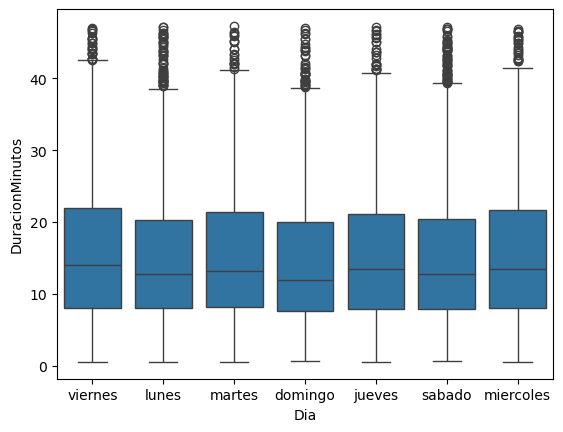

In [8]:
sns.boxplot(x='Dia', y='DuracionMinutos', data=df);

In [9]:
df.head()

id  dropoff_longitude  dropoff_latitude  DuracionMinutos  DistanciaKm  \
104  48028        -100.363633         25.700368        43.533333        6.681   
107  89523        -100.184078         25.778774        39.750000        3.033   
111  44154        -100.296799         25.639075        41.400000        5.199   
115  89531        -100.173469         25.796127        35.300000        1.442   
118  72769        -100.272574         25.678928        38.750000        5.663   

         Dia  
104  viernes  
107    lunes  
111    lunes  
115    lunes  
118   martes

**Creación de variables dicotómicas**: La función `get_dummies` convierte una variable categórica (con k categorías) en k variables dicotómicas. Entre otros parámetros se puede establecer:
- prefix: agrega un prefijo a los nombres de las columnas.
- dtype: de manera predeterminada está en *booleano*, se puede cambiar a *int*
- drop_first: quita la columna con la primera categoría

Puedes usar esta función para crear un nuevo dataframe de las variables dummy o puedes aplicarlo directamente al dataframe.

Es importante considerar que
- Si una variable categórica tiene más de dos categorías, se deben crear k – 1 variables dummy para evitar multicolinealidad (esto se puede automatizar con drop_first=True en pd.get_dummies()).
- El grupo que se omite (referencia) es el que se considera como base para las comparaciones.
- Las variables dummy permiten capturar efectos de pertenencia a una categoría específica, no cambios graduales como ocurre con variables continuas.


In [10]:
# Crear variables dicotómicas
df = pd.get_dummies(df, columns=['Dia'], prefix='dia',  
                    dtype=int, drop_first=True)
df.head(3)

id  dropoff_longitude  dropoff_latitude  DuracionMinutos  DistanciaKm  \
104  48028        -100.363633         25.700368        43.533333        6.681   
107  89523        -100.184078         25.778774        39.750000        3.033   
111  44154        -100.296799         25.639075        41.400000        5.199   

     dia_jueves  dia_lunes  dia_martes  dia_miercoles  dia_sabado  dia_viernes  
104           0          0           0              0           0            1  
107           0          1           0              0           0            0  
111           0          1           0              0           0            0

In [11]:
df.columns

Index(['id', 'dropoff_longitude', 'dropoff_latitude', 'DuracionMinutos',
       'DistanciaKm', 'dia_jueves', 'dia_lunes', 'dia_martes', 'dia_miercoles',
       'dia_sabado', 'dia_viernes'],
      dtype='object')

In [12]:
X = df[['DistanciaKm', 'dia_lunes', 'dia_martes', 'dia_miercoles', 
        'dia_jueves', 'dia_viernes', 'dia_sabado']]  
# Añadir una columna de unos para el intercepto
X = sm.add_constant(X)
y = df['DuracionMinutos']

In [13]:
# Ajustar el modelo de regresión
model = sm.OLS(y, X).fit()

# Imprimir los resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        DuracionMinutos   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     1537.
Date:                Tue, 18 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:12:06   Log-Likelihood:                -29046.
No. Observations:                8740   AIC:                         5.811e+04
Df Residuals:                    8732   BIC:                         5.816e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.2070      0.205     25.385